In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
import mlrose_hiive as mlrose

SEED = 42
exp_name="Knapsack"
output_dir = "experiment_results"

In [219]:
np.random.seed(SEED)
weights = np.random.rand(50)
values = np.random.rand(50)
max_weight_pct = 0.65
print(weights)
print(values)

# Initialize fitness function object using pre-defined class
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

np.random.seed(SEED)
init_state = np.random.randint(3, size=50)
print(init_state)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446]
[0.96958463 0.77513282 0.93949894 0.89482735 0.59789998 0.92187424
 0.0884925  0.19598286 0.04522729 0.32533033 0.38867729 0.27134903
 0.82873751 0.35675333 0.28093451 0.54269608 0.14092422 0.80219698
 0.07455064 0.98688694 0.77224477 0.19871568 0.00552212 0.81546143
 0.70685734 0.72900717 0.77127035 0.07404465 0.35846573 0.11586906
 0.86310343 0.62329813 0.33089802 0.06355835 0.31098232 0.32518332
 0.72960618 0.63755747 0.88721274 0.47

<h3>Utility Functions</h3>

In [3]:
# plotting fitness curves, training time, function evaluation 
# [learning curves, loss per iteration, how many iterations to convergence / wall clock time]

def create_plots():
    return

<h1>Genetic Algorithm</h1>

In [171]:
# Define optimization problem object
mlrose.DiscreteOpt
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)

[2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1]


In [179]:
# Solve using genetic algorithm  

# first use a runner to test multiple parameters for cross validation
ga = mlrose.GARunner(problem=problem,
                  experiment_name=exp_name,
                  output_directory=output_dir,
                  seed=SEED,
                  iteration_list=[80],
                  max_attempts=1000,
                  population_sizes=[5, 10],
                  mutation_rates=[0.1])

t0 = time.time()

# the two data frames will contain the results
ga_df_run_stats, ga_df_run_curves = ga.run()

t1=time.time()
print(t1-t0)

0.1237797737121582


In [180]:
ga_df_run_stats.loc[ga_df_run_stats['Fitness'] >=1]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
3,80,22.812774,905,0.061871,"[2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, ...",10,0.1,80


In [181]:
ga_df_run_curves.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000514,0.0,5.0,5,0.1,80
1,1,0.007675,0.0,11.0,5,0.1,80
2,2,0.008105,0.0,17.0,5,0.1,80
3,3,0.008563,0.0,23.0,5,0.1,80
4,4,0.009053,0.0,29.0,5,0.1,80


In [182]:
# Define optimization problem object
mlrose.DiscreteOpt
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)

# choose best parameters (based on run time) and run
t0 = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem,
                                                                     pop_size=10,
                                                                     mutation_prob=0.1,
                                                                     max_attempts=1000,
                                                                     max_iters=80,
                                                                     curve=True, 
                                                                     random_state=42)
t1=time.time()
ga_time = t1-t0
print(ga_time)
print(ga_best_state)
print(ga_best_fitness)
print(ga_fitness_curve)

0.06350898742675781
[2 0 0 0 0 2 1 0 0 0 0 0 0 0 2 1 1 1 0 2 2 2 1 0 1 0 2 1 0 2 1 2 0 1 0 1 1
 1 2 0 0 2 1 1 1 1 1 0 1 2]
22.812774129632682
[[  0.          21.        ]
 [ 18.37658555  33.        ]
 [ 18.37658555  44.        ]
 [ 18.37658555  55.        ]
 [ 18.87430935  67.        ]
 [ 18.87430935  78.        ]
 [ 18.87430935  89.        ]
 [ 19.6231818  101.        ]
 [ 19.6231818  112.        ]
 [ 19.6231818  123.        ]
 [ 19.6231818  134.        ]
 [ 19.6231818  145.        ]
 [ 19.90065655 157.        ]
 [ 19.90065655 168.        ]
 [ 19.90065655 179.        ]
 [ 19.90065655 190.        ]
 [ 19.90065655 201.        ]
 [ 19.90065655 212.        ]
 [ 19.90065655 223.        ]
 [ 19.90065655 234.        ]
 [ 19.90065655 245.        ]
 [ 19.90065655 256.        ]
 [ 19.90065655 267.        ]
 [ 20.01472868 279.        ]
 [ 20.01472868 290.        ]
 [ 20.01472868 301.        ]
 [ 20.01472868 312.        ]
 [ 20.0202508  324.        ]
 [ 20.0202508  335.        ]
 [ 20.58739695 34

<h1>Simulated Annealing</h1>

In [183]:
# Define optimization problem object
mlrose.DiscreteOpt
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)
print(init_state)

# Solve using simulated annealing  
# first use a runner to determine best hyperparameters
sa = mlrose.SARunner(problem=problem,
              experiment_name=exp_name,
              output_directory=output_dir,
              seed=SEED,
              iteration_list=[80],
              max_attempts=1000,
              temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
              decay_list=[mlrose.GeomDecay])            
t0 = time.time()

# the two data frames will contain the results
sa_df_run_stats, sa_df_run_curves = sa.run()

t1=time.time()
print(t1-t0)

[2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1]
0.23911809921264648


In [184]:
sa_df_run_stats

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,0.0,0,0.000195,"[2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, ...",geometric,1,0.99,0.001,0.999998,1,80
1,80,0.0,160,0.016610,"[0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",geometric,1,0.99,0.001,0.999833,1,80
2,0,0.0,0,0.000118,"[2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, ...",geometric,10,0.99,0.001,9.999988,10,80
3,80,0.0,160,0.016112,"[0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",geometric,10,0.99,0.001,9.998381,10,80
4,0,0.0,0,0.000172,"[2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, ...",geometric,50,0.99,0.001,49.999914,50,80
5,80,0.0,160,0.017325,"[0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",geometric,50,0.99,0.001,49.991294,50,80
6,0,0.0,0,0.000120,"[2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, ...",geometric,100,0.99,0.001,99.999880,100,80
7,80,0.0,160,0.013182,"[0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",geometric,100,0.99,0.001,99.986753,100,80
8,0,0.0,0,0.000108,"[2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, ...",geometric,250,0.99,0.001,249.999727,250,80
9,80,0.0,160,0.012932,"[0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",geometric,250,0.99,0.001,249.967510,250,80


In [185]:
sa_df_run_curves.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000195,0.0,0.0,1,80
1,1,0.007953,0.0,2.0,1,80
2,2,0.008074,0.0,4.0,1,80
3,3,0.008153,0.0,6.0,1,80
4,4,0.008226,0.0,8.0,1,80


In [192]:
# Define optimization problem object
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)
print(init_state)

# then run with best parameters
t0 = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem, 
                                                                     schedule=mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001),
                                                                     max_attempts=1000,
                                                                     max_iters=80,
                                                                     init_state = init_state,
                                                                     curve=True,
                                                                     random_state=42)
t1=time.time()
sa_time = t1-t0
print(sa_time)
print(sa_best_state)
print(sa_best_fitness)
print(sa_fitness_curve)

[2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1]
0.007345914840698242
[0 2 1 0 0 2 0 2 1 1 1 1 0 1 0 1 0 0 1 2 0 2 0 1 0 1 1 0 2 2 2 0 1 2 1 1 2
 1 0 0 0 2 0 1 2 2 0 2 2 2]
0.0
[[  0.   3.]
 [  0.   5.]
 [  0.   7.]
 [  0.   9.]
 [  0.  11.]
 [  0.  13.]
 [  0.  15.]
 [  0.  17.]
 [  0.  19.]
 [  0.  21.]
 [  0.  23.]
 [  0.  25.]
 [  0.  27.]
 [  0.  29.]
 [  0.  31.]
 [  0.  33.]
 [  0.  35.]
 [  0.  37.]
 [  0.  39.]
 [  0.  41.]
 [  0.  43.]
 [  0.  45.]
 [  0.  47.]
 [  0.  49.]
 [  0.  51.]
 [  0.  53.]
 [  0.  55.]
 [  0.  57.]
 [  0.  59.]
 [  0.  61.]
 [  0.  63.]
 [  0.  65.]
 [  0.  67.]
 [  0.  69.]
 [  0.  71.]
 [  0.  73.]
 [  0.  75.]
 [  0.  77.]
 [  0.  79.]
 [  0.  81.]
 [  0.  83.]
 [  0.  85.]
 [  0.  87.]
 [  0.  89.]
 [  0.  91.]
 [  0.  93.]
 [  0.  95.]
 [  0.  97.]
 [  0.  99.]
 [  0. 101.]
 [  0. 103.]
 [  0. 105.]
 [  0. 107.]
 [  0. 109.]
 [  0. 111.]
 [  0. 113.]
 [  0. 115.]
 [  0. 117.]
 [  0. 119.]
 [

<h1>Randomized Hill Climbing</h1>

In [205]:
# Solve using randomized hill climbing
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)
print(init_state)

# first use a runner to determine best hyperparameters
rhc = mlrose.RHCRunner(problem=problem,
                experiment_name=exp_name,
                output_directory=output_dir,
                seed=SEED,
                iteration_list=[80],
                max_attempts=1000,
                restart_list=[25, 75, 100]) 

t0 = time.time()

# the two data frames will contain the results
rhc_df_run_stats, rhc_df_run_curves = rhc.run()

t1=time.time()
print(t1-t0)

[2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1]
59.226582050323486


In [217]:
rhc_df_run_stats.loc[rhc_df_run_stats['Fitness']>=15]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
9,80,20.882858,402,0.138382,"[2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, ...",25,80,4
61,80,20.882858,402,0.214493,"[2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, ...",75,80,4
131,80,16.829946,3206,5.492051,"[2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, ...",75,80,39
196,0,15.333252,5766,16.316629,"[1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, ...",75,80,72
197,80,17.002198,5850,16.682984,"[1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, ...",75,80,72
213,80,20.882858,402,0.528699,"[2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, ...",100,80,4
283,80,16.829946,3206,8.500745,"[2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, ...",100,80,39
348,0,15.333252,5766,21.883665,"[1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, ...",100,80,72
349,80,17.002198,5850,22.296281,"[1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, ...",100,80,72
377,80,19.949941,6975,30.131519,"[0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 2, ...",100,80,86


In [207]:
rhc_df_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000214,0.0,0.0,25,80,0
1,1,0.007826,0.0,1.0,25,80,0
2,2,0.007881,0.0,2.0,25,80,0
3,3,0.007929,0.0,3.0,25,80,0
4,4,0.007975,0.0,4.0,25,80,0
...,...,...,...,...,...,...,...
16238,76,0.013533,0.0,8095.0,100,80,100
16239,77,0.013641,0.0,8096.0,100,80,100
16240,78,0.013750,0.0,8097.0,100,80,100
16241,79,0.013860,0.0,8098.0,100,80,100


In [229]:
# Define optimization problem object

print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)

# then run with best parameters
t0 = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem, 
                                                                   max_attempts=1000,
                                                                   max_iters=80,
                                                                   restarts=100,
                                                                   init_state = init_state,
                                                                   curve=True,
                                                                   random_state=42)
t1=time.time()
rhc_time=t1-t0
print(rhc_time)
print(rhc_best_state)
print(rhc_best_fitness)
print(rhc_fitness_curve)

[2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1]
0.24754595756530762
[2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1]
0.0
[[ 0.  1.]
 [ 0.  2.]
 [ 0.  3.]
 [ 0.  4.]
 [ 0.  5.]
 [ 0.  6.]
 [ 0.  7.]
 [ 0.  8.]
 [ 0.  9.]
 [ 0. 10.]
 [ 0. 11.]
 [ 0. 12.]
 [ 0. 13.]
 [ 0. 14.]
 [ 0. 15.]
 [ 0. 16.]
 [ 0. 17.]
 [ 0. 18.]
 [ 0. 19.]
 [ 0. 20.]
 [ 0. 21.]
 [ 0. 22.]
 [ 0. 23.]
 [ 0. 24.]
 [ 0. 25.]
 [ 0. 26.]
 [ 0. 27.]
 [ 0. 28.]
 [ 0. 29.]
 [ 0. 30.]
 [ 0. 31.]
 [ 0. 32.]
 [ 0. 33.]
 [ 0. 34.]
 [ 0. 35.]
 [ 0. 36.]
 [ 0. 37.]
 [ 0. 38.]
 [ 0. 39.]
 [ 0. 40.]
 [ 0. 41.]
 [ 0. 42.]
 [ 0. 43.]
 [ 0. 44.]
 [ 0. 45.]
 [ 0. 46.]
 [ 0. 47.]
 [ 0. 48.]
 [ 0. 49.]
 [ 0. 50.]
 [ 0. 51.]
 [ 0. 52.]
 [ 0. 53.]
 [ 0. 54.]
 [ 0. 55.]
 [ 0. 56.]
 [ 0. 57.]
 [ 0. 58.]
 [ 0. 59.]
 [ 0. 60.]
 [ 0. 61.]
 [ 0. 62.]
 [ 0. 63.]
 [ 0. 64.]
 [ 0. 65.]
 [ 0. 66.]
 [ 0. 67.]
 [ 0. 68.]
 [ 0. 69.]
 [ 0. 70.]


<h1>MIMIC</h1>

In [103]:
# Define optimization problem object
mlrose.DiscreteOpt
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)
print(init_state)

# Solve using MIMIC
mmc = mlrose.MIMICRunner(problem=problem,
                         experiment_name=exp_name,
                         output_directory=output_dir,
                         seed=SEED,
                         iteration_list=[50, 60, 70, 80],
                         max_attempts=1000,
                         population_sizes=[100, 200, 300, 400],
                         keep_percent_list=[0.1, 0.25, 0.5, 0.75],
                         use_fast_mimic=True)

t0 = time.time()
# the two data frames will contain the results
mmc_df_run_stats, mmc_df_run_curves = mmc.run()
t1=time.time()
print(t1-t0)

[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8
 6 1 3 8 1 9 8 9 4 1 3 6 7]
41.164036989212036


In [104]:
mmc_df_run_stats.loc[mmc_df_run_stats["Fitness"] >= 23]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
41,50,23.442485,15355,1.704982,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.10,80
42,60,23.442485,18365,2.052572,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.10,80
43,70,23.442485,21375,2.402550,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.10,80
44,80,23.442485,24385,2.749849,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.10,80
46,50,23.442485,15355,1.713501,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.25,80
47,60,23.442485,18365,2.060439,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.25,80
48,70,23.442485,21375,2.410023,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.25,80
49,80,23.442485,24385,2.754625,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.25,80
51,50,23.442485,15355,1.691700,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.50,80
52,60,23.442485,18365,2.035140,"[0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...",True,300,0.50,80


In [105]:
mmc_df_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.004557,0.000000,100.0,True,100,0.10,80
1,1,0.043324,19.344730,202.0,True,100,0.10,80
2,2,0.068135,21.741951,304.0,True,100,0.10,80
3,3,0.088894,21.741951,405.0,True,100,0.10,80
4,4,0.111095,21.741951,506.0,True,100,0.10,80
...,...,...,...,...,...,...,...,...
1291,76,1.620622,22.559607,30879.0,True,400,0.75,80
1292,77,1.640223,22.559607,31280.0,True,400,0.75,80
1293,78,1.659603,22.559607,31681.0,True,400,0.75,80
1294,79,1.678916,22.559607,32082.0,True,400,0.75,80


In [70]:
# Define optimization problem object
print(init_state)
mlrose.DiscreteOpt
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=3)

# then run with best parameters
t0 = time.time()
mmc_best_state, mmc_best_fitness, mmc_fitness_curve = mlrose.mimic(problem,
                                                       pop_size=300,
                                                       keep_pct=0.25,
                                                       max_attempts=1000,
                                                       max_iters=80,
                                                       curve=True,
                                                       random_state=42)
t1=time.time()
mmc_time = t1-t0
print(mmc_time)
print(mmc_best_state)
print(mmc_best_fitness)
print(mmc_fitness_curve)

[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8
 6 1 3 8 1 9 8 9 4 1 3 6 7]
82.48997616767883
[0 0 1 0 2 2 0 1 1 0 0 0 0 0 1 1 0 2 1 2 2 2 0 0 1 1 1 0 0 0 2 2 2 0 0 0 2
 2 1 0 0 0 0 1 1 0 2 2 0 1]
23.442485049105933
[[2.16897868e+01 6.02000000e+02]
 [2.16897868e+01 9.03000000e+02]
 [2.19274642e+01 1.20500000e+03]
 [2.28987525e+01 1.50700000e+03]
 [2.28987525e+01 1.80800000e+03]
 [2.28987525e+01 2.10900000e+03]
 [2.29928751e+01 2.41100000e+03]
 [2.29928751e+01 2.71200000e+03]
 [2.29928751e+01 3.01300000e+03]
 [2.29928751e+01 3.31400000e+03]
 [2.29928751e+01 3.61500000e+03]
 [2.29928751e+01 3.91600000e+03]
 [2.29928751e+01 4.21700000e+03]
 [2.29928751e+01 4.51800000e+03]
 [2.29928751e+01 4.81900000e+03]
 [2.29928751e+01 5.12000000e+03]
 [2.29928751e+01 5.42100000e+03]
 [2.29928751e+01 5.72200000e+03]
 [2.29928751e+01 6.02300000e+03]
 [2.29928751e+01 6.32400000e+03]
 [2.29928751e+01 6.62500000e+03]
 [2.29928751e+01 6.92600000e+03]
 [2.29928751e+01 7.22700000e+03

,Algorithm,Fitness
0,Genetic Algorithm,22.812774
1,Simulated Annealing,0.000000
2,Random Hill Climbing,0.000000
3,MIMIC,23.442485


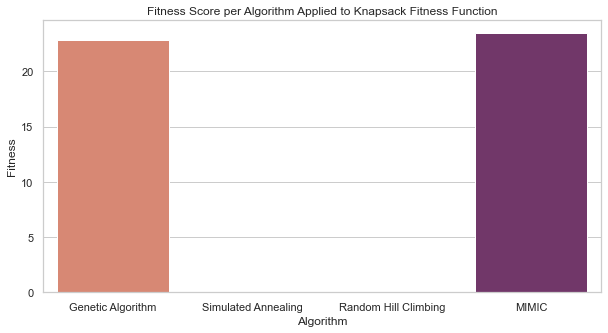

In [230]:
#  bar plot of fitness vs algorithm
sns.set_theme(style="whitegrid")
data = [['Genetic Algorithm', ga_best_fitness], ['Simulated Annealing', sa_best_fitness], ['Random Hill Climbing', rhc_best_fitness], ['MIMIC', mmc_best_fitness]]
df = pd.DataFrame(data, columns = ['Algorithm', 'Fitness'])
ax = sns.barplot(x="Algorithm", y="Fitness", data=df, palette="flare")
ax.set_title("Fitness Score per Algorithm Applied to Knapsack Fitness Function")
plt.savefig('experiment_results/Knapsack/Knapsack_Fitness_BarPlot.png', dpi=300)
df

,Algorithm,Time (s)
0,Genetic Algorithm,0.063509
1,Simulated Annealing,0.007346
2,Random Hill Climbing,0.247546
3,MIMIC,82.489976


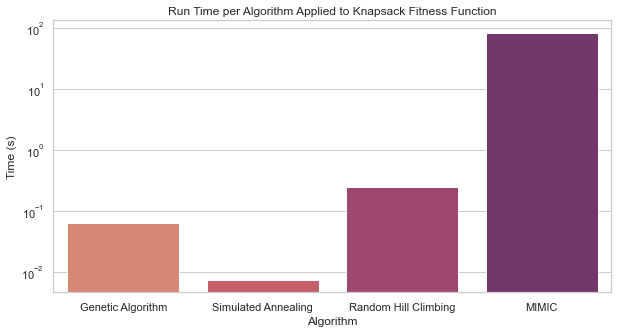

In [232]:
#  bar plot of time vs algorithm
sns.set_theme(style="whitegrid")
data = [['Genetic Algorithm', ga_time], ['Simulated Annealing', sa_time], ['Random Hill Climbing', rhc_time], ['MIMIC', mmc_time]]
df = pd.DataFrame(data, columns = ['Algorithm', 'Time (s)'])
ax = sns.barplot(x="Algorithm", y="Time (s)", data=df, palette="flare")
ax.set_title("Run Time per Algorithm Applied to Knapsack Fitness Function")
ax.set_yscale("log")
plt.savefig('experiment_results/Knapsack/Knapsack_Time_BarPlot.png', dpi=300)
df

In [233]:
df_ga_fitness_curve = pd.DataFrame(ga_fitness_curve, columns=['Fitness', 'FEvals'])
df_ga_fitness_curve['Algorithm'] = 'Genetic Algorithm'
df_ga_fitness_curve

,Fitness,FEvals,Algorithm
0,0.000000,21.0,Genetic Algorithm
1,18.376586,33.0,Genetic Algorithm
2,18.376586,44.0,Genetic Algorithm
3,18.376586,55.0,Genetic Algorithm
4,18.874309,67.0,Genetic Algorithm
...,...,...,...
75,22.812774,861.0,Genetic Algorithm
76,22.812774,872.0,Genetic Algorithm
77,22.812774,883.0,Genetic Algorithm
78,22.812774,894.0,Genetic Algorithm


In [234]:
df_sa_fitness_curve = pd.DataFrame(sa_fitness_curve, columns=['Fitness', 'FEvals'])
df_sa_fitness_curve['Algorithm'] = 'Simulated Annealing'
df_sa_fitness_curve

,Fitness,FEvals,Algorithm
0,0.0,3.0,Simulated Annealing
1,0.0,5.0,Simulated Annealing
2,0.0,7.0,Simulated Annealing
3,0.0,9.0,Simulated Annealing
4,0.0,11.0,Simulated Annealing
...,...,...,...
75,0.0,153.0,Simulated Annealing
76,0.0,155.0,Simulated Annealing
77,0.0,157.0,Simulated Annealing
78,0.0,159.0,Simulated Annealing


In [235]:
df_rhc_fitness_curve = pd.DataFrame(rhc_fitness_curve, columns=['Fitness', 'FEvals'])
df_rhc_fitness_curve['Algorithm'] = 'Random Hill Climbing'
df_rhc_fitness_curve

,Fitness,FEvals,Algorithm
0,0.0,1.0,Random Hill Climbing
1,0.0,2.0,Random Hill Climbing
2,0.0,3.0,Random Hill Climbing
3,0.0,4.0,Random Hill Climbing
4,0.0,5.0,Random Hill Climbing
...,...,...,...
75,0.0,76.0,Random Hill Climbing
76,0.0,77.0,Random Hill Climbing
77,0.0,78.0,Random Hill Climbing
78,0.0,79.0,Random Hill Climbing


In [236]:
df_mmc_fitness_curve = pd.DataFrame(mmc_fitness_curve, columns=['Fitness', 'FEvals'])
df_mmc_fitness_curve['Algorithm'] = 'MIMIC'
df_mmc_fitness_curve

,Fitness,FEvals,Algorithm
0,21.689787,602.0,MIMIC
1,21.689787,903.0,MIMIC
2,21.927464,1205.0,MIMIC
3,22.898753,1507.0,MIMIC
4,22.898753,1808.0,MIMIC
...,...,...,...
75,23.442485,23181.0,MIMIC
76,23.442485,23482.0,MIMIC
77,23.442485,23783.0,MIMIC
78,23.442485,24084.0,MIMIC


In [237]:
df_total = pd.concat([df_ga_fitness_curve, df_sa_fitness_curve, df_rhc_fitness_curve, df_mmc_fitness_curve], ignore_index=True)
total_wide = df_total.pivot("FEvals", "Algorithm", "Fitness")
total_wide

Algorithm,Genetic Algorithm,MIMIC,Random Hill Climbing,Simulated Annealing
FEvals,,,,
1.0,NaN,NaN,0.0,NaN
2.0,NaN,NaN,0.0,NaN
3.0,NaN,NaN,0.0,0.0
4.0,NaN,NaN,0.0,NaN
5.0,NaN,NaN,0.0,0.0
...,...,...,...,...
23181.0,NaN,23.442485,NaN,NaN
23482.0,NaN,23.442485,NaN,NaN
23783.0,NaN,23.442485,NaN,NaN


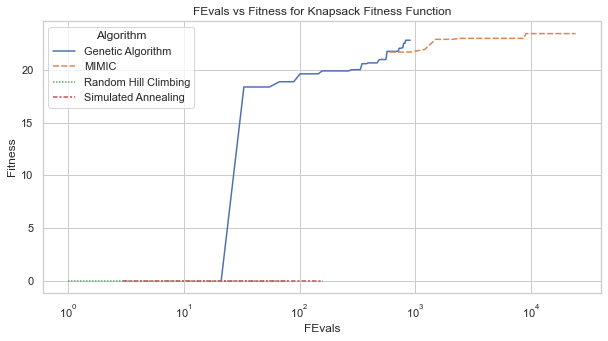

In [238]:
# plot average fitness per iteration 
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=total_wide)
ax.set_title("FEvals vs Fitness for Knapsack Fitness Function")
ax.set_ylabel("Fitness")
ax.set_xscale("log")
plt.savefig('experiment_results/Knapsack/Knapsack_FitnessIteration_LinePlot.png', dpi=300)